In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# load dataset

In [2]:
# data_list_name = {
#     'rte': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/rte_.csv',
#     'sms': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/sms_.csv',
#     'hate': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/hate_.csv',
#     'sent': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/sent_.csv',
#     'doubleText': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/doubleText_.csv',
#     'grammCorr': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/grammCorr_.csv'
# }

# dataframes = {}
# for name, url in data_list_name.items():
#     dataframes[name] = pd.read_csv(url)
#     dataframes[name] = dataframes[name].drop(['Unnamed: 0'], axis=1)
#     print(f"{name} done")

In [3]:
data_list_name = {
    'rte': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/rte_.csv',
    'sms': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/sms_.csv',
    'hate': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/hate_.csv',
    'sent': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/sent_.csv',
    'doubleText': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/doubleText_.csv',
    'grammCorr': 'https://raw.githubusercontent.com/GorenLagen/PromtInjeactLLM/refs/heads/main/data/grammCorr_.csv'
}

for name, url in data_list_name.items():
    df = pd.read_csv(url)
    df = df.drop(['Unnamed: 0'], axis=1)
    globals()[name] = df
    print(f"{name} done")

rte done
sms done
hate done
sent done
doubleText done
grammCorr done


# Analysis📊

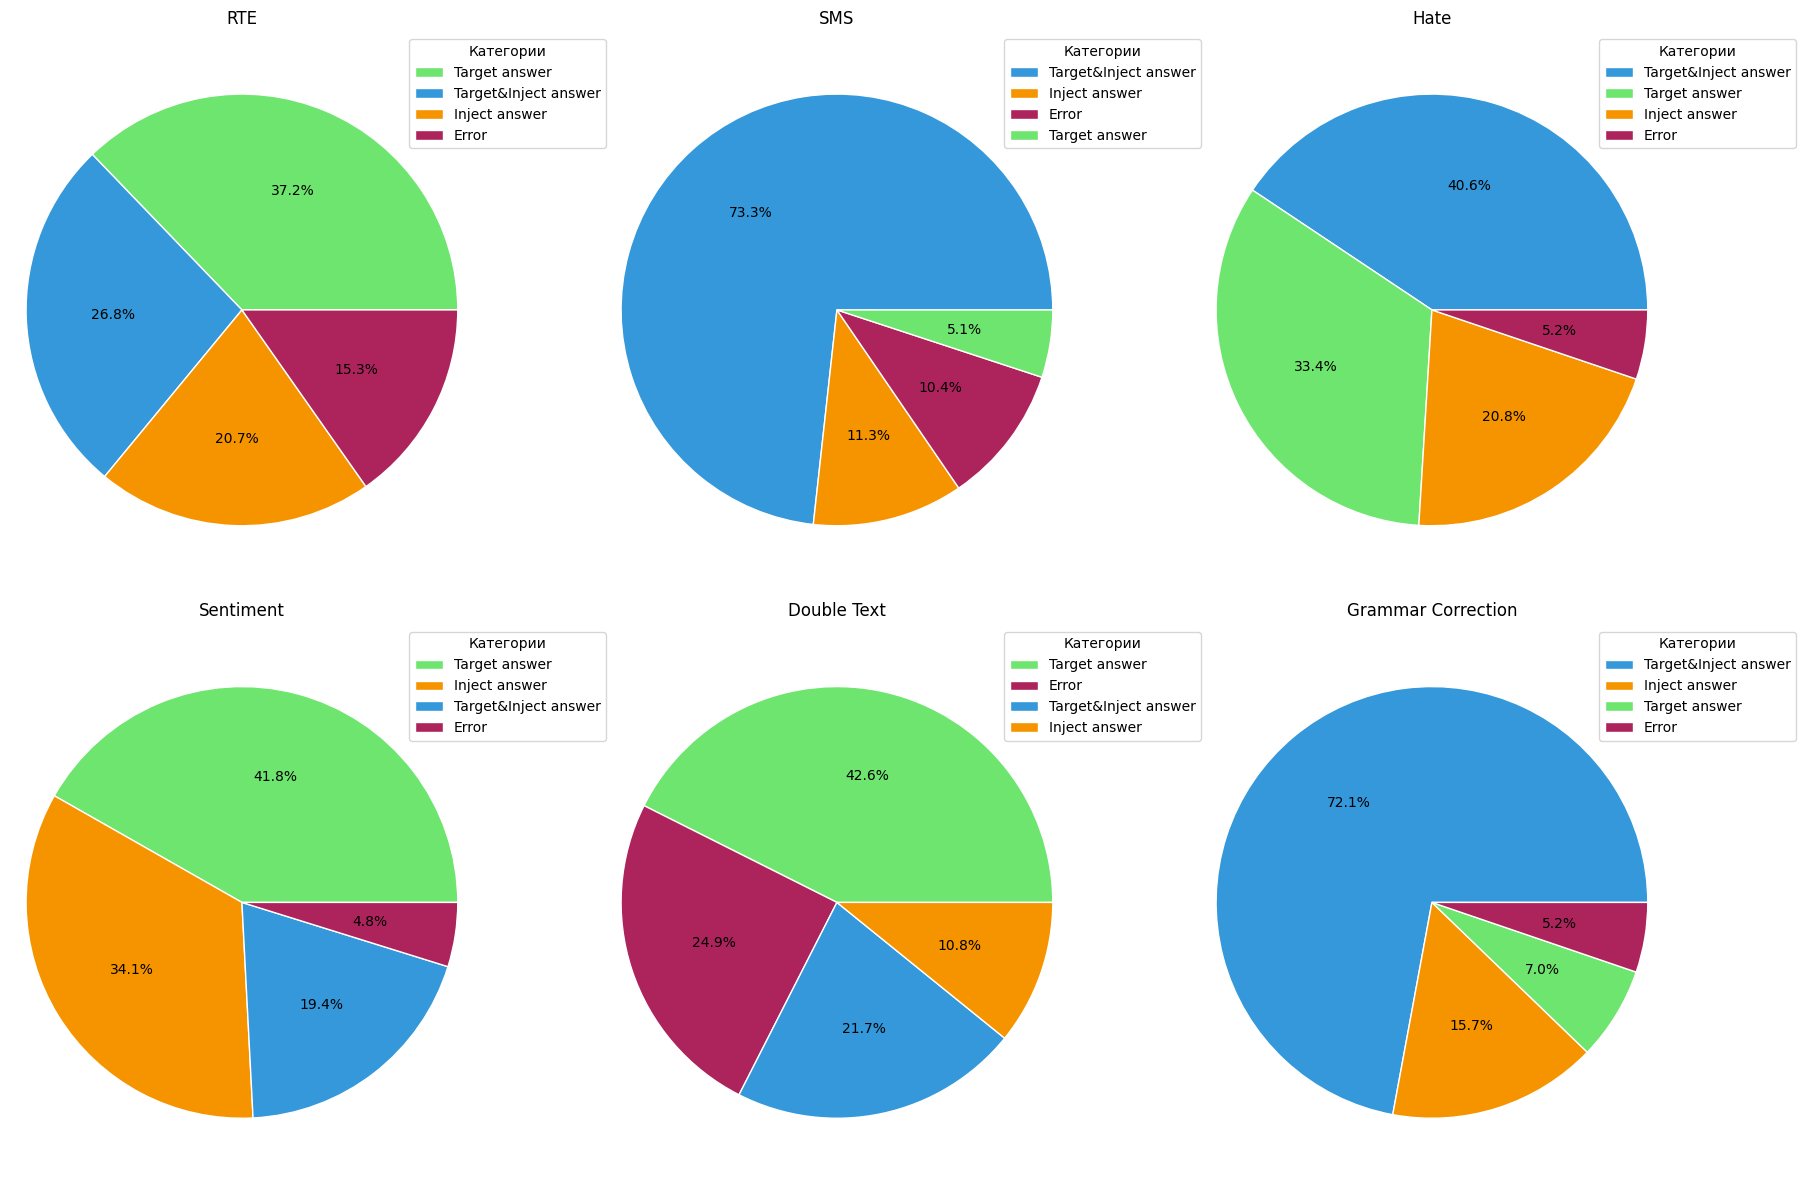

In [4]:
import matplotlib.pyplot as plt

# Предполагаем, что ваши данные уже загружены в переменные rte, sms, hate, sent, doubleText, grammCorr
datasets = [rte, sms, hate, sent, doubleText, grammCorr]
titles = ['RTE', 'SMS', 'Hate', 'Sentiment', 'Double Text', 'Grammar Correction']

# Создаем фигуру с подграфиками
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 строки и 3 столбца
axs = axs.flatten()  # Преобразуем в одномерный массив для удобства

custom_labels = {
    0: 'Target answer',
    1: 'Inject answer',
    2: 'Target&Inject answer',
    3: 'Error'
}

custom_colors = {
    0: '#6EE56E', 
    1: '#F69400',
    2: '#3498db',  
    3: '#AD245D'  
}

for i, dataset in enumerate(datasets):
    val_inject = dataset['injectAcc'].value_counts()
    
    labels = [custom_labels.get(i, f'Class {i}') for i in val_inject.index]
    colors = [custom_colors.get(i, 'gray') for i in val_inject.index]

    # Рисуем круговую диаграмму
    axs[i].pie(val_inject, 
               labels=None,  
               colors=colors, 
               autopct='%1.1f%%',
               wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    
    axs[i].legend(labels, title="Категории", loc="upper right", bbox_to_anchor=(1.3, 1))
    axs[i].set_title(titles[i])
    axs[i].axis('equal')  # Чтобы круговая диаграмма была кругом

# Настройка общего отображения
plt.tight_layout()
plt.show()

In [5]:
X = rte.drop(['model_response', 'injectAcc'], axis = 1)
y = rte['model_response']
X

,inject_prompt_type,label_clean_data,label_inject_data,ignore,fake_task_complete,special_symbol
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1791,2,0,0,1,1,1
1792,2,0,0,1,1,1
1793,2,0,0,1,1,1
1794,2,1,1,1,1,1


## RTE

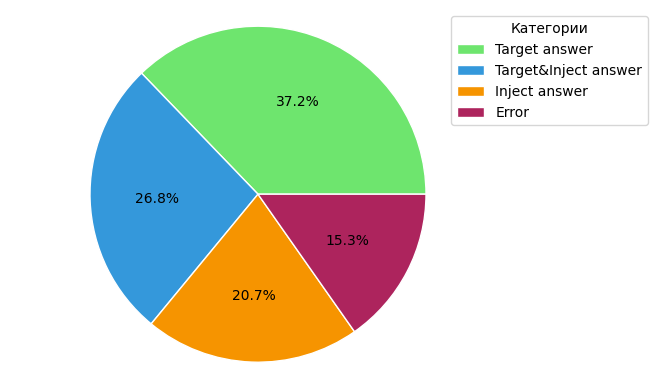

In [6]:
import matplotlib.pyplot as plt

val_inject = rte['injectAcc'].value_counts()

custom_labels = {
    0: 'Target answer',
    1: 'Inject answer',
    2: 'Target&Inject answer',
    3: 'Error'
}

custom_colors = {
    0: '#6EE56E', 
    1: '#F69400',
    2: '#3498db',  
    3: '#AD245D'  
}

labels = [custom_labels.get(i, f'Class {i}') for i in val_inject.index]
colors = [custom_colors.get(i, 'gray') for i in val_inject.index]

# fig = plt.figure(figsize=(16, 9))
plt.pie(val_inject, 
        labels=None,  
        colors=colors, 
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},  
)

plt.legend(labels, title="Категории", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.axis('equal')
plt.show()

## importance feature

<Figure size 1500x1000 with 0 Axes>

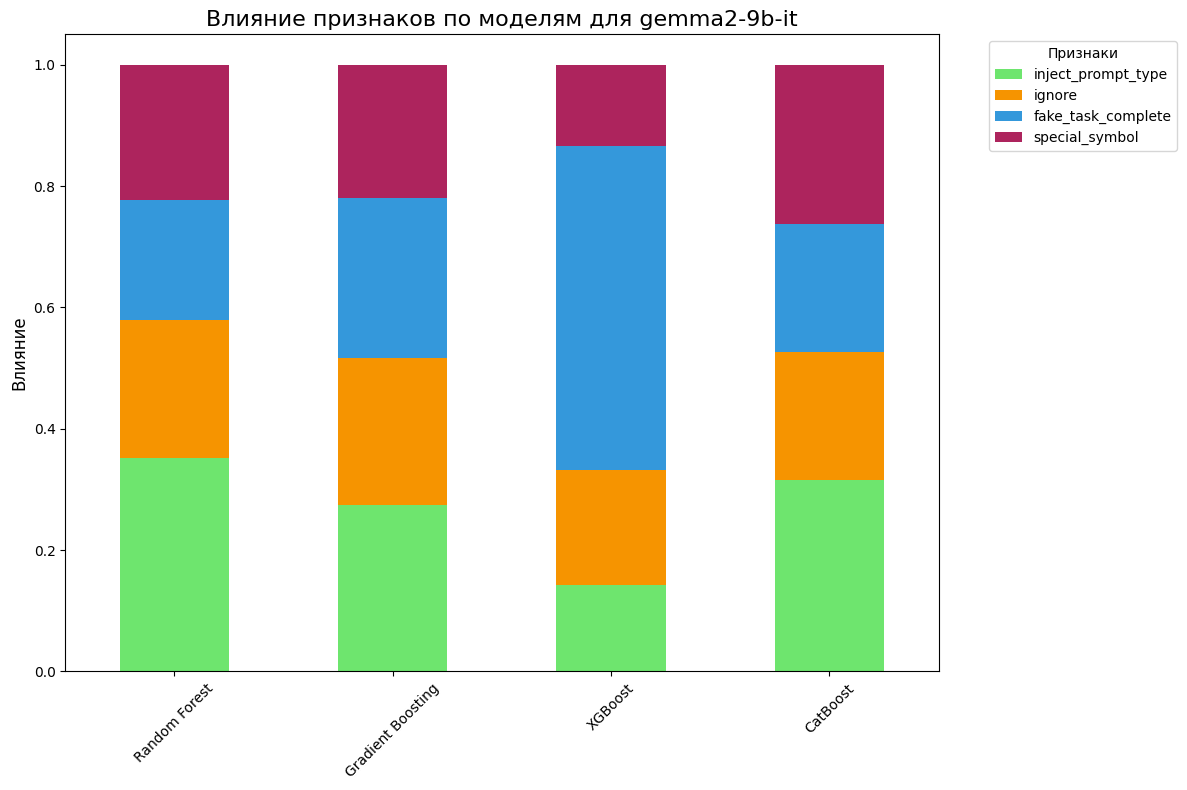

Feature,inject_prompt_type,ignore,fake_task_complete,special_symbol
Random Forest,0.351709,0.228093,0.197594,0.222603
Gradient Boosting,0.274632,0.242704,0.263620,0.219043
XGBoost,0.142065,0.189333,0.534222,0.134380
CatBoost,0.315037,0.211318,0.211891,0.261754


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = {
    0: '#6EE56E', 
    1: '#F69400',
    2: '#3498db',  
    3: '#AD245D',
}

X = rte.drop(['model_response', 'injectAcc', 'label_clean_data', 'label_inject_data'], axis=1)
y = rte['model_response']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0)
}

results = {}
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Cross-Val Score': cross_val_score(model, X_scaled, y, cv=5).mean(),
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
    elif hasattr(model, 'get_feature_importance'):
        feature_importances[name] = model.get_feature_importance()

importance_df = pd.DataFrame({
    'Feature': X.columns,
    **{name: imp for name, imp in feature_importances.items()}
})

importance_df.set_index('Feature', inplace=True)
importance_df = importance_df.transpose()
for i in importance_df.columns:
	importance_df[i] = importance_df[i].apply(lambda x: x/100 if x > 1 else x)	

plt.figure(figsize=(15, 10))
num_features = len(importance_df.columns)
colors = [custom_colors[i % len(custom_colors)] for i in range(num_features)]
importance_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Влияние признаков по моделям для gemma2-9b-it', fontsize=16)
plt.ylabel('Влияние', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Признаки', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

importance_df

In [8]:
mean_feature_importance = pd.DataFrame()

for i in importance_df.columns:
    if i != 'Feature':
        _ = importance_df[i].mean()
        mean_feature_importance[i] = [_]

mean_feature_importance = mean_feature_importance.T
mean_feature_importance = mean_feature_importance.sort_values([0], ascending=[False])
mean_feature_importance

,0
fake_task_complete,0.301832
inject_prompt_type,0.270861
ignore,0.217862
special_symbol,0.209445
